# MLflow使用方法のサンプル

このノートブックではMLflowの基本的な使用方法を説明します。

## 1. MLflowのセットアップ

MLflowサーバーへの接続設定を行います。compose.yamlで定義されているMLflowサーバーを使用します。

In [11]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd

In [12]:
# MLflowトラッキングサーバーのURI設定
mlflow.set_tracking_uri("http://localhost:5000")

# 現在のトラッキングURIを確認
print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")

MLflow Tracking URI: http://localhost:5000


## 2. Experimentの作成・設定

実験を管理するためのExperimentを作成します。

In [13]:
# Experimentの作成または取得
experiment_name = "iris-classification"
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    print(f"Created new experiment: {experiment_name} (ID: {experiment_id})")
else:
    experiment_id = experiment.experiment_id
    print(f"Using existing experiment: {experiment_name} (ID: {experiment_id})")

mlflow.set_experiment(experiment_name)

Using existing experiment: iris-classification (ID: 1)


<Experiment: artifact_location='s3://mlflow-artifacts-xxx/artifact_location/1', creation_time=1754221799149, experiment_id='1', last_update_time=1754221799149, lifecycle_stage='active', name='iris-classification', tags={}>

## 3. データの準備

サンプルデータセット（Iris）を使用してモデルを訓練します。

In [14]:
# データの読み込み
iris = load_iris()
X, y = iris.data, iris.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (120, 4)
Test data shape: (30, 4)


## 4. モデルの訓練とMLflowでのトラッキング

複数の異なるパラメータでモデルを訓練し、結果をMLflowで記録します。

In [15]:
# 複数のパラメータセットでモデルを訓練
param_combinations = [
    {"n_estimators": 50, "max_depth": 3, "random_state": 42},
    {"n_estimators": 100, "max_depth": 5, "random_state": 42},
    {"n_estimators": 200, "max_depth": 10, "random_state": 42}
]

for i, params in enumerate(param_combinations):
    with mlflow.start_run(run_name=f"random_forest_run_{i+1}"):
        # パラメータをログ
        mlflow.log_params(params)
        
        # モデルの訓練
        model = RandomForestClassifier(**params)
        model.fit(X_train, y_train)
        
        # 予測
        y_pred = model.predict(X_test)
        
        # メトリクスの計算とログ
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        
        # モデルのログ
        mlflow.sklearn.log_model(model, name="model")
        
        # 追加情報のログ
        mlflow.set_tag("model_type", "RandomForest")
        mlflow.set_tag("dataset", "iris")
        
        print(f"Run {i+1}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")

2025/08/03 20:54:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/08/03 20:54:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 1: Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000
🏃 View run random_forest_run_1 at: http://localhost:5000/#/experiments/1/runs/0741e30920f7478991abf52f98468960
🧪 View experiment at: http://localhost:5000/#/experiments/1


2025/08/03 20:54:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/08/03 20:54:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 2: Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000
🏃 View run random_forest_run_2 at: http://localhost:5000/#/experiments/1/runs/33566d3a4eb14bcc842d2f65ba09c3ba
🧪 View experiment at: http://localhost:5000/#/experiments/1


2025/08/03 20:54:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/08/03 20:54:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 3: Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000
🏃 View run random_forest_run_3 at: http://localhost:5000/#/experiments/1/runs/55d407c6e35b4754a727939c1483bc7c
🧪 View experiment at: http://localhost:5000/#/experiments/1


## 5. アーティファクトのログ

図表やデータファイルなどのアーティファクトをログします。

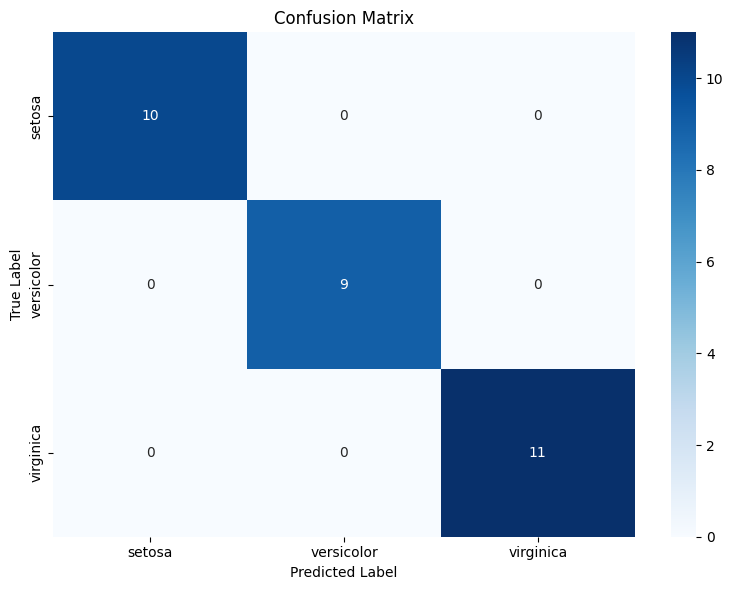

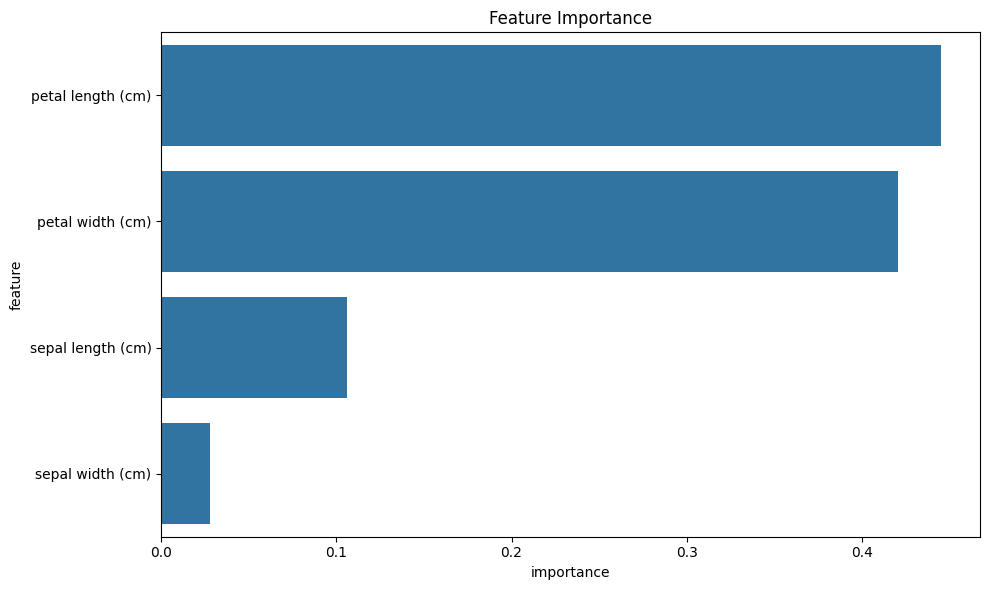

2025/08/03 20:54:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/03 20:54:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/08/03 20:54:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged with accuracy: 1.0000
🏃 View run model_with_artifacts at: http://localhost:5000/#/experiments/1/runs/56a9ac9b7e0b42f69a52ab615386382c
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

with mlflow.start_run(run_name="model_with_artifacts"):
    # パラメータ
    params = {"n_estimators": 100, "max_depth": 5, "random_state": 42}
    mlflow.log_params(params)
    
    # モデル訓練
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # メトリクス
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)
    
    # 混同行列の可視化
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, 
                yticklabels=iris.target_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    
    # 図をファイルとして保存してログ
    plt.savefig('confusion_matrix.png')
    mlflow.log_artifact('confusion_matrix.png')
    plt.show()
    
    # 特徴量重要度の可視化
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'feature': iris.feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.tight_layout()
    
    plt.savefig('feature_importance.png')
    mlflow.log_artifact('feature_importance.png')
    plt.show()
    
    # CSVファイルとしてデータを保存してログ
    feature_importance.to_csv('feature_importance.csv', index=False)
    mlflow.log_artifact('feature_importance.csv')
    
    # モデルのログ
    mlflow.sklearn.log_model(model, "model")
    
    print(f"Model logged with accuracy: {accuracy:.4f}")

## 6. 過去の実験結果の取得

MLflowから過去の実験結果を取得して比較します。

In [17]:
# 現在のexperimentの全実行を取得
runs = mlflow.search_runs(experiment_ids=[experiment_id])

# 結果の表示
print("Experiment Results:")
print("="*50)
display_columns = ['run_id', 'metrics.accuracy', 'metrics.precision', 'metrics.recall', 
                  'params.n_estimators', 'params.max_depth', 'tags.mlflow.runName']
available_columns = [col for col in display_columns if col in runs.columns]
print(runs[available_columns].head())

Experiment Results:
                             run_id  metrics.accuracy  metrics.precision  \
0  56a9ac9b7e0b42f69a52ab615386382c               1.0                NaN   
1  55d407c6e35b4754a727939c1483bc7c               1.0                1.0   
2  33566d3a4eb14bcc842d2f65ba09c3ba               1.0                1.0   
3  0741e30920f7478991abf52f98468960               1.0                1.0   
4  502b7b2c4f29458da384e799d8a30a9d               1.0                NaN   

   metrics.recall params.n_estimators params.max_depth   tags.mlflow.runName  
0             NaN                 100                5  model_with_artifacts  
1             1.0                 200               10   random_forest_run_3  
2             1.0                 100                5   random_forest_run_2  
3             1.0                  50                3   random_forest_run_1  
4             NaN                 100                5  model_with_artifacts  


In [18]:
# 最高スコアの実行を取得
if 'metrics.accuracy' in runs.columns:
    best_run = runs.loc[runs['metrics.accuracy'].idxmax()]
    print(f"Best Run ID: {best_run['run_id']}")
    print(f"Best Accuracy: {best_run['metrics.accuracy']:.4f}")
    print(f"Parameters: n_estimators={best_run.get('params.n_estimators', 'N/A')}, max_depth={best_run.get('params.max_depth', 'N/A')}")

Best Run ID: 56a9ac9b7e0b42f69a52ab615386382c
Best Accuracy: 1.0000
Parameters: n_estimators=100, max_depth=5


## 7. モデルの読み込みと推論

保存されたモデルを読み込んで推論を行います。

In [19]:
# 最高スコアのモデルを読み込み
if 'metrics.accuracy' in runs.columns and len(runs) > 0:
    best_run_id = runs.loc[runs['metrics.accuracy'].idxmax(), 'run_id']
    model_uri = f"runs:/{best_run_id}/model"
    
    # モデルの読み込み
    loaded_model = mlflow.sklearn.load_model(model_uri)
    
    # テストデータで推論
    predictions = loaded_model.predict(X_test)
    
    print(f"Loaded model from run: {best_run_id}")
    print(f"Test predictions: {predictions[:10]}")
    print(f"Actual labels: {y_test[:10]}")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")

Loaded model from run: 56a9ac9b7e0b42f69a52ab615386382c
Test predictions: [1 0 2 1 1 0 1 2 1 1]
Actual labels: [1 0 2 1 1 0 1 2 1 1]
Accuracy: 1.0000


## 8. MLflow UIでの結果確認

MLflow UIで結果を確認するには、以下のURLにアクセスしてください：

http://localhost:5000

ここで以下の情報を確認できます：
- 実験の一覧
- 各実行のパラメータとメトリクス
- モデルの比較
- アーティファクト（図表、ファイルなど）
- モデルの詳細情報

## まとめ

このノートブックでは以下のMLflowの機能を学習しました：

1. **トラッキングサーバーへの接続**: `mlflow.set_tracking_uri()`でcompose.yamlで定義されたサーバーに接続
2. **Experimentの管理**: 実験の作成と設定
3. **Runの作成**: `mlflow.start_run()`で実行コンテキストを作成
4. **パラメータのログ**: `mlflow.log_params()`でハイパーパラメータを記録
5. **メトリクスのログ**: `mlflow.log_metric()`で評価指標を記録
6. **モデルのログ**: `mlflow.sklearn.log_model()`でモデルを保存
7. **アーティファクトのログ**: 図表やファイルの保存
8. **実験結果の取得**: `mlflow.search_runs()`で過去の結果を取得
9. **モデルの読み込み**: 保存されたモデルの読み込みと推論

MLflowを使用することで、機械学習実験の管理、モデルの比較、再現性の確保が簡単に行えます。